# Telecom Churn - Case Study

In [849]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Load Data

In [850]:
# Read data

df = pd.read_csv("telecom_churn_data.csv")
df.head()

df_original = df.copy()

# Data Analysis and Preparation

Lets Look at all columns and remove unrequired columns

In [851]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [852]:
df

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [853]:
# lets check nulls in total_rech_amt_6 and total_rech_amt_7

df.loc[:, ['total_rech_amt_6','total_rech_amt_7']].isna().sum()

total_rech_amt_6    0
total_rech_amt_7    0
dtype: int64

In [854]:
# Lets filter data based on requirement
# Those who have recharged with an amount more than or equal to X, 
# where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

df.loc[:, 'total_reach_amt_67'] = df[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)

In [855]:
df['total_reach_amt_67']

0        307.0
1        229.0
2        241.5
3        270.0
4        273.0
         ...  
99994     85.0
99995    110.0
99996     59.5
99997    369.5
99998    355.0
Name: total_reach_amt_67, Length: 99999, dtype: float64

In [856]:
df['total_reach_amt_67'].describe(percentiles=[0.7])

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
50%        229.000000
70%        368.500000
max      37762.500000
Name: total_reach_amt_67, dtype: float64

In [857]:
# Filter DataFrame

df = df[df['total_reach_amt_67'] >= df['total_reach_amt_67'].quantile(0.7)]

In [858]:
# lets check length of df

df.shape

(30011, 227)

## Derive Churn
We can check if there are any nulls in the columns basaed on which we are going to derive Churn vs non Churn
The columns are - total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9

In [859]:
# checking nulls in required columns

df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isna().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [860]:
# as there are no nulls, we can tag the record as Churn = True/False based on the condition

churn = df.loc[:, ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0
df.loc[:, 'churn'] = churn

C:\Users\adi00\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\adi00\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [861]:
# lets drop all columns which are corresponding to 9th month

columns_to_remove = df.columns[df.columns.str.find('_9') != -1]
df = df.drop(columns_to_remove, axis = 1)

In [862]:
df

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_reach_amt_67,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0,True
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00

In [863]:
# sep_vbc_3g column can be dropped
# Date columns are not required. Lets drop all date columns
# Also, we can remove some columns which are not useful

columns_to_remove = ['mobile_number','circle_id', 'sep_vbc_3g',
                     'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                     'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
                     'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']
df = df.drop(columns_to_remove, axis=1)

In [864]:
df

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_reach_amt_67,churn
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,1185.0,True
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,NaN,2.0,3.0,NaN,154.0,23.0,NaN,2.0,3.0,NaN,0.0,0.0,NaN,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,NaN,0.00,19.83,NaN,0.00,0.00,NaN,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,NaN,1.0,1.0,315,21.03,910.65,122.16,519.0,False
13,0.0,0.0,0.0,492.8

## Missing value treatment

In [865]:
# check nulls

round(df.isna().sum()/len(df)*100, 2)

loc_og_t2o_mou         0.38
std_og_t2o_mou         0.38
loc_ic_t2o_mou         0.38
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
onnet_mou_6            1.05
onnet_mou_7            1.01
onnet_mou_8            3.13
offnet_mou_6           1.05
offnet_mou_7           1.01
offnet_mou_8           3.13
roam_ic_mou_6          1.05
roam_ic_mou_7          1.01
roam_ic_mou_8          3.13
roam_og_mou_6          1.05
roam_og_mou_7          1.01
roam_og_mou_8          3.13
loc_og_t2t_mou_6       1.05
loc_og_t2t_mou_7       1.01
loc_og_t2t_mou_8       3.13
loc_og_t2m_mou_6       1.05
loc_og_t2m_mou_7       1.01
loc_og_t2m_mou_8       3.13
loc_og_t2f_mou_6       1.05
loc_og_t2f_mou_7       1.01
loc_og_t2f_mou_8       3.13
loc_og_t2c_mou_6       1.05
loc_og_t2c_mou_7       1.01
loc_og_t2c_mou_8       3.13
loc_og_mou_6           1.05
loc_og_mou_7           1.01
loc_og_mou_8           3.13
std_og_t2t_mou_6       1.05
std_og_t2t_mou_7       1.01
std_og_t2t_mou_8    

In [866]:
df[df.churn].isna().sum()/len(df[df.churn]) * 100

loc_og_t2o_mou         1.966834
std_og_t2o_mou         1.966834
loc_ic_t2o_mou         1.966834
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
onnet_mou_6            4.087929
onnet_mou_7            6.131894
onnet_mou_8           28.384111
offnet_mou_6           4.087929
offnet_mou_7           6.131894
offnet_mou_8          28.384111
roam_ic_mou_6          4.087929
roam_ic_mou_7          6.131894
roam_ic_mou_8         28.384111
roam_og_mou_6          4.087929
roam_og_mou_7          6.131894
roam_og_mou_8         28.384111
loc_og_t2t_mou_6       4.087929
loc_og_t2t_mou_7       6.131894
loc_og_t2t_mou_8      28.384111
loc_og_t2m_mou_6       4.087929
loc_og_t2m_mou_7       6.131894
loc_og_t2m_mou_8      28.384111
loc_og_t2f_mou_6       4.087929
loc_og_t2f_mou_7       6.131894
loc_og_t2f_mou_8      28.384111
loc_og_t2c_mou_6       4.087929
loc_og_t2c_mou_7       6.131894
loc_og_t2c_mou_8      28.384111
loc_og_mou_6           4.087929
loc_og_m

In [867]:
# Lets check rows with maximum nulls

row_null_count = df.isna().sum(axis=1)
row_null_count.sort_values(ascending=False)

57525    117
30548    117
96449    117
32368    117
74778    117
        ... 
33967      0
33959      0
82735      0
33917      0
99997      0
Length: 30011, dtype: int64

In [868]:
# lets check such rows wih 117 missing values

df.loc[row_null_count[row_null_count==117].index]

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_reach_amt_67,churn
3506,NaN,NaN,NaN,996.558,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,0,875,0,0,550,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2033,0.00,0.00,0.00,437.5,True
4190,NaN,NaN,NaN,2502.516,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,0,0,2555,0,0,655,0,0,550,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,266,0.00,0.00,303.54,1277.5,True
5539,NaN,NaN,NaN,249.000,243.106,374.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,

Looks like above rows have all columns null except for month 6. In our analysis we are considering that month 6 and 7 are good phase and 8 as action phase. Since these customers could not give us the insight based on our assumption. We should drop these rows where 117 columns have null values. These rows have around 70% values null

In [869]:
# dropping rows

df = df.drop(row_null_count[row_null_count==117].index)
df.shape

(29989, 162)

In [870]:
# check nulls

pd.DataFrame(round(df.isna().sum()/len(df)*100, 2)).sort_values(by=[0],ascending=False)

,0
night_pck_user_6,62.00
max_rech_data_6,62.00
arpu_2g_6,62.00
fb_user_6,62.00
total_rech_data_6,62.00
arpu_3g_6,62.00
count_rech_2g_6,62.00
av_rech_amt_data_6,62.00
count_rech_3g_6,62.00
arpu_2g_7,61.11


In [871]:
# check columns where are more than 50%. We can remove these columns 

columns_to_remove = df.loc[:, round(df.isna().sum()/len(df)*100, 2) > 50].columns
columns_to_remove

# dropping columns with more than 50% nulls

df = df.drop(columns_to_remove, axis=1)

In [872]:
# check nulls

pd.DataFrame(round(df.isna().sum()/len(df)*100, 2)).sort_values(by=[0],ascending=False)

,0
std_ic_mou_8,3.05
loc_og_t2t_mou_8,3.05
loc_og_t2f_mou_8,3.05
std_ic_t2m_mou_8,3.05
loc_og_t2c_mou_8,3.05
loc_ic_t2m_mou_8,3.05
std_og_t2t_mou_8,3.05
std_ic_t2t_mou_8,3.05
std_og_t2m_mou_8,3.05
std_og_t2f_mou_8,3.05


In [873]:
# lets check the nulls in 6th and 7th month (good phase)

df[df.std_ic_mou_6.isna() & df.std_ic_mou_7.isna()]

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_reach_amt_67,churn
1489,0.0,0.0,0.0,600.339,76.826,986.809,NaN,NaN,0.00,NaN,NaN,6.96,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,6.96,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,6.96,NaN,NaN,0.0,0.0,0.0,6.96,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,0.0,0.0,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,2,2,5,707,91,1162,455,91,455,455,0,252,87.65,230.56,42.79,3220.44,14.59,4407.08,0,0,0,0,0,0,2,0,3,0,1,0,1658,66.00,0.00,0.00,399.0,False
2185,NaN,NaN,NaN,386.514,386.506,386.491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,2,455,455,455,455,455,455,455,455,455,3.65,71.00,11.73,285.63,2316.13,1429.59,0,0,0,0,0,0,1,1,1,0,0,0,882,172.71,657.55,9.22,455.0,False
5220,NaN,NaN,NaN,427.619,213.786,213.799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2,504,252,252,252,252,252,252,252,252,0.00,0.00,0.00,1396.55,1147.64,1242.65,0,0,0,0,0,0,2,1,1,0,0,0,1112,0.00,0.00,0.00,378.0,False
8265,NaN,NaN,NaN,386.503,381.676,213.801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [874]:
len(df[df.std_ic_mou_6.isna() & df.std_ic_mou_7.isna()])/len(df)

0.00393477608456434

We dont have any information from good phase and also the percentage is very small, we can drop these records

In [875]:
df = df.drop(df[df.std_ic_mou_6.isna() & df.std_ic_mou_7.isna()].index, axis=0)

In [876]:
# lets check the nulls in 6th and 7th month (good phase)

df[df.std_ic_mou_6.isna() & ~df.std_ic_mou_7.isna() & ~df.std_ic_mou_8.isna()]

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_reach_amt_67,churn
77,0.0,0.0,0.0,30.000,82.378,674.950,NaN,34.23,149.69,NaN,39.44,179.18,NaN,0.00,0.00,NaN,0.00,0.00,NaN,34.23,149.69,NaN,32.18,101.63,NaN,0.91,29.86,NaN,0.00,3.90,NaN,67.33,281.19,NaN,0.00,0.00,NaN,0.00,0.00,NaN,6.35,40.09,NaN,0.0,0.0,NaN,6.35,40.09,NaN,2.93,28.04,NaN,0.00,7.58,NaN,0.0,0.00,0.0,76.61,356.93,NaN,79.46,191.24,NaN,43.31,94.18,NaN,2.03,0.00,NaN,124.81,285.43,NaN,8.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.0,0.0,NaN,8.00,0.00,0.0,135.38,289.33,NaN,0.00,0.00,NaN,2.56,0.50,NaN,0.00,3.39,4,5,3,0,1154,750,0,1000,750,0,0,750,0.00,96.48,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,1894,0.00,0.00,0.00,577.0,False
364,0.0,0.0,0.0,0.000,792.112,989.368,NaN,433.49,198.96,NaN,845.11,923.58,NaN,0.00,0.00,NaN,0.00,0.00,NaN,28.78,7.46,NaN,78.78,584.76,NaN,21.58,9.43,NaN,0.00,0.00,NaN,129.14,601.66,NaN,404.71,191.49,NaN,722.01,321.41,NaN,0.00,0.00,NaN,0.0,0.0,NaN,1126.73,512.91,NaN,0.00,0.00,NaN,45.14,13.84,NaN,0.0,0.00,0.0,1301.03,1128.43,NaN,7.41,10.23,NaN,69.39,93.48,NaN,0.00,0.83,NaN,76.81,104.54,NaN,5.81,10.09,NaN,37.94,86.63,NaN,0.00,0.00,NaN,0.0,0.0,NaN,43.76,96.73,0.0,185.14,219.59,NaN,0.00,0.00,NaN,64.56,18.31,NaN,0.00,0.00,4,12,24,0,970,1104,0,154,154,0,50,50,0.00,565.78,2108.66,0.00,0.00,0.00,0,1,1,0,0,2,0,0,0,0,0,1,424,0.00,0.00,0.00,485.0,False
423,0.0,0.0,0.0,213.802,304.194,149.710,NaN,0.00,0.00,NaN,10.03,1.45,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.58,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.58,NaN,0.00,0.00,NaN,0.00,0.25,NaN,0.00,0.61,NaN,0.0,0.0,NaN,0.00,0.86,NaN,10.03,0.00,NaN,0.00,0.00,NaN,0.0,0.00,0.0,10.03,1.45,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.36,NaN,0.0,0.0,NaN,0.00,0.36,0.0,8.31,0.36,NaN,0.00,0.00,NaN,8.31,0.00,NaN,0.00,0.00,4,4,3,252,591,0,252,339,0,252,0,0,3.30,38.45,0.00,669.36,837.18,0.00,0,0,0,0,0,0,1,1,0,0,0,0,945,73.55,266.94,63.04,421.5,False
934,0.0,0.0,0.0,48.000,764.152,500.030,NaN,14.24,17.48,NaN,16.99,76.86,NaN,0.00,8.81,NaN,0.00,1.56,NaN,0.08,17.48,NaN,16.99,63.23,NaN,0.00,12.08,NaN,0.00,0.00,NaN,17.08,92.79

In [877]:
# lets capture all column prefixes so that we can automate value imputations

column_prefixes = df.loc[:, df.columns.str.endswith("_6") | df.columns.str.endswith("_7")].columns.str[:-2]
column_prefixes = set(column_prefixes)
column_prefixes

{'arpu',
 'ic_others',
 'isd_ic_mou',
 'isd_og_mou',
 'last_day_rch_amt',
 'loc_ic_mou',
 'loc_ic_t2f_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2t_mou',
 'loc_og_mou',
 'loc_og_t2c_mou',
 'loc_og_t2f_mou',
 'loc_og_t2m_mou',
 'loc_og_t2t_mou',
 'max_rech_amt',
 'monthly_2g',
 'monthly_3g',
 'offnet_mou',
 'og_others',
 'onnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'sachet_2g',
 'sachet_3g',
 'spl_ic_mou',
 'spl_og_mou',
 'std_ic_mou',
 'std_ic_t2f_mou',
 'std_ic_t2m_mou',
 'std_ic_t2o_mou',
 'std_ic_t2t_mou',
 'std_og_mou',
 'std_og_t2c_mou',
 'std_og_t2f_mou',
 'std_og_t2m_mou',
 'std_og_t2t_mou',
 'total_ic_mou',
 'total_og_mou',
 'total_rech_amt',
 'total_rech_num',
 'vol_2g_mb',
 'vol_3g_mb'}

In [878]:
# lets impute columns 6 and 7. If value in 6 is null then take the value from 7
# The reason for this is - We know that month 6 and month 7 is good phase. So if value is missing from this month,
# it is more likely that the value should be close to or equal to month 7's value

for col in column_prefixes:
    df[col+'_6'] = df[col+'_6'].fillna(df[col+'_7'])

In [879]:
# We will do same for 7th month missing value. i.e. replace missing value with 6 month's value

for col in column_prefixes:
    df[col+'_7'] = df[col+'_7'].fillna(df[col+'_6'])

In [880]:
# for month 8, wherever null we can fill with average of month 6 and 7

for col in column_prefixes:
    df[col+'_8'] = df[col+'_8'].fillna((df[col+'_6'] + df[col+'_7']).mean())

In [881]:
# check nulls

pd.DataFrame(round(df.isna().sum()/len(df)*100, 2)).sort_values(by=[0],ascending=False)

,0
loc_og_t2o_mou,0.0
std_ic_mou_7,0.0
total_rech_num_6,0.0
ic_others_8,0.0
ic_others_7,0.0
ic_others_6,0.0
isd_ic_mou_8,0.0
isd_ic_mou_7,0.0
isd_ic_mou_6,0.0
spl_ic_mou_8,0.0


In [882]:
# Lets see counts of Churns

df.churn.value_counts()

False    27329
True      2542
Name: churn, dtype: int64

In [883]:
# Percentage of churners

len(df[df.churn])/len(df) * 100

8.509926015198687

In [884]:
# lets find outliers

df.describe(percentiles=[.05,.1,.25,.5,.75,.9,.95,.99])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_reach_amt_67
count,29871.0,29871.0,29871.0,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.0,29871.0,29871.0,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.0,29871.0,29871.0,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000
mean,0.0,0.0,0.0,587.213918,589.765224,535.794808,299.967695,307.536977,285.445744,422.572109,428.946185,400.016103,17.647220,13.758726,14.175440,29.718432,22.467303,22.995423,95.326695,96.638765,92.788711,182.668063,182.959459,178.353072,7.053293,7.160655,6.912814,1.587823,1.880046,1.814451,285.056940,286.767931,278.063555,192.893129,202.018931,18

In [885]:
# find highly skewed columns

def getHighSkewedColumns(df):     
    output = []
    threshold = .85 * (len(df))
    for col in df.columns:
        if(df[col].value_counts().max() >= threshold):
            output.append((col, round(df[col].value_counts().max()/len(df)*100),2))
    
    return output  

skewed_col = getHighSkewedColumns(df)
skewed_col

[('loc_og_t2o_mou', 100, 2),
 ('std_og_t2o_mou', 100, 2),
 ('loc_ic_t2o_mou', 100, 2),
 ('std_og_t2c_mou_6', 100, 2),
 ('std_og_t2c_mou_7', 100, 2),
 ('std_og_t2c_mou_8', 100, 2),
 ('isd_og_mou_6', 91, 2),
 ('isd_og_mou_7', 91, 2),
 ('isd_og_mou_8', 90, 2),
 ('og_others_7', 99, 2),
 ('og_others_8', 97, 2),
 ('std_ic_t2o_mou_6', 100, 2),
 ('std_ic_t2o_mou_7', 100, 2),
 ('std_ic_t2o_mou_8', 100, 2),
 ('spl_ic_mou_7', 94, 2),
 ('spl_ic_mou_8', 89, 2),
 ('monthly_2g_6', 89, 2),
 ('monthly_2g_7', 88, 2),
 ('monthly_2g_8', 90, 2),
 ('monthly_3g_6', 88, 2),
 ('monthly_3g_7', 88, 2),
 ('monthly_3g_8', 89, 2),
 ('sachet_3g_6', 93, 2),
 ('sachet_3g_7', 93, 2),
 ('sachet_3g_8', 94, 2),
 ('churn', 91, 2)]

In [886]:
skewed_col_names = [c[0] for c in skewed_col]

# since for some columns we are removing 7 and 8 month's columns, so we can remove 6th months columns as well
skewed_col_names.extend(['spl_ic_mou_6', 'og_others_6'])

skewed_col_names.remove('churn') # remove churn column from this list as we do not want to drop it

In [887]:
# drop skewed columns

df = df.drop(skewed_col_names, axis=1)

In [888]:
# lets find outliers

df.describe(percentiles=[.05,.1,.25,.5,.75,.9,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_reach_amt_67
count,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000
mean,587.213918,589.765224,535.794808,299.967695,307.536977,285.445744,422.572109,428.946185,400.016103,17.647220,13.758726,14.175440,29.718432,22.467303,22.995423,95.326695,96.638765,92.788711,182.668063,182.959459,178.353072,7.053293,7.160655,6.912814,1.587823,1.880046,1.814451,285.056940,286.767931,278.063555,192.893129,202.018931,183.790811,205.905589,216.223080,191.930751,2.034518,2.052258,1.909757,400.837610,420.298635,377.635476,5.987259,7.503826,7.284346,689.915969,712.448270,626.669220,69.205674,71.095946,70.078197,160.745004,162.239511,163.160360,15.713105,16.630091,15.658779,245.673717,249.975631,248.907507,16.426742,17.102966,16.035987,32.344162,33.875632,32.384572,2.894131,3.012942,2.854857,51.669045,53.995616,51.279395,308.953326,316.351237,296.794984,11.376476,12.584661,12.409935,1.201090,1.488951,1.317027,12.159988,11.953969,10.263366,697.445047,696.717418,614.645609,170.191222,174.677614,162.245556,103.464196,104.682133,95.188912,79.114752,78.408201,69.426607,251.198371,271.050859,264.144935,0.50259

In [889]:
# we see too many outliers
# lets cap at 95% tile for upper and 1% tile for lower

df = df.apply(lambda x: x.clip(upper=np.percentile(x, 95), lower=np.percentile(x, 1)))

In [890]:
df.describe(percentiles=[.05,.1,.25,.5,.75,.9,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_reach_amt_67
count,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.00000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.00000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000
mean,560.043548,562.719500,507.497180,266.728630,273.524481,249.973499,389.172531,394.132987,365.541849,9.183752,5.729162,6.519938,17.037713,11.351202,11.947947,71.396489,71.781668,70.523286,164.703878,166.121580,161.709961,5.022181,5.137189,4.991917,0.964996,1.131481,1.130579,257.256831,259.093449,251.802103,163.058348,171.389013,151.528762,173.063099,181.723327,158.154626,0.715058,0.691309,0.705623,362.979465,380.468196,336.694772,4.370842,5.57789,5.430641,650.120938,669.442417,583.937023,55.075770,55.630398,55.80330,143.608835,145.216889,147.158046,11.417849,11.981792,11.545596,222.548319,226.156795,226.669959,9.818230,10.223153,9.764533,22.726771,23.567809,22.766412,1.230150,1.268904,1.265221,38.242548,39.654002,37.853622,282.747268,288.581650,270.953111,4.359755,5.089662,4.980772,0.357478,0.471636,0.448353,11.597402,11.368451,9.717853,663.335710,662.645107,581.237320,156.389876,161.326404,149.937531,89.391986,90.342104,82.173178,52.107391,50.231211,42.067439,180.405429,199.742874,190.434530,0.333434,0.425932,0.45

In [891]:
# To capture the change in action month, we will take average of the values for month 6 and 7
# Then we take difference between average(6,7 month) and 8 month's value
# e.g. if mean recharge value in month 6 and 7 was 100 and in month 8 it reduced to 40
# then we get the value as -60 which will indicate that there was a drop in recharge 
# post this we can keep the new value and drop 6, 7, 8 month's columns

def calculate_diff(col, dframe):
    diff = dframe[col + '_8'] - dframe[[col + '_6',col + '_7']].mean(axis=1)
    return diff

def delete_cols(col, dframe):
#     return dframe.drop([col+'_6', col+'_7', col+'_8'], axis=1)
    return dframe.drop([col+'_6', col+'_7'], axis=1)

column_prefixes = df.loc[:, df.columns.str.endswith("_6") | df.columns.str.endswith("_7")].columns.str[:-2]
column_prefixes = set(column_prefixes)
column_prefixes

for col in column_prefixes:
    df['chg_'+col] = calculate_diff(col, df)
    df = delete_cols(col, df)

In [892]:
df

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,sachet_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_reach_amt_67,churn,chg_roam_og_mou,chg_std_og_t2m_mou,chg_offnet_mou,chg_loc_og_mou,chg_sachet_2g,chg_loc_og_t2t_mou,chg_total_ic_mou,chg_loc_og_t2m_mou,chg_loc_og_t2f_mou,chg_vol_2g_mb,chg_std_og_t2t_mou,chg_std_ic_mou,chg_vol_3g_mb,chg_std_ic_t2f_mou,chg_total_rech_num,chg_std_ic_t2t_mou,chg_total_og_mou,chg_std_og_t2f_mou,chg_std_og_mou,chg_isd_ic_mou,chg_loc_ic_t2m_mou,chg_spl_og_mou,chg_arpu,chg_std_ic_t2m_mou,chg_ic_others,chg_max_rech_amt,chg_total_rech_amt,chg_onnet_mou,chg_loc_og_t2c_mou,chg_last_day_rch_amt,chg_loc_ic_t2f_mou,chg_loc_ic_t2t_mou,chg_roam_ic_mou,chg_loc_ic_mou
7,1260.853,52.29,325.91,31.640,38.06,40.28,162.28,31.46,0.00,255.790,12.01,49.14,7.21,77.84,6.50,350.16,27.31,121.190,39.53,188.040,30.39,122.425,11.01,192.34,428.74,31.590,3.945,7,1496,455,252,0.00,0.000,0,802.0,57.740,19.38,18.74,1185.0,True,19.895,8.315,-184.385,-222.245,0.0,-1.1050,-163.5100,-215.725,-2.7925,0.000,-1.7850,15.5300,0.000,-1.360,2.0,6.0300,-198.225,-0.135,9.840,23.295,-98.335,4.250,95.2120,13.210,-0.345,-24.5,361.5,-3.9700,0.000,252.0,-35.3275,-17.890,6.780,-203.515
8,137.362,35.08,136.48,0.000,0.00,12.49,50.54,0.00,7.15,63.040,22.58,75.69,0.00,98.28,10.23,171.56,0.31,15.480,0.00,15.790,0.10,0.650,0.00,0.75,16.54,0.000,0.000,14,120,30,10,0.03,11.940,3,315.0,21.030,842.82,122.16,519.0,False,0.000,63.825,48.835,-270.095,2.5,-244.8700,-49.6350,-25.230,0.0000,-177.970,-102.4150,-12.7950,-363.535,0.000,-6.0,-0.1900,-298.450,0.000,-38.590,0.000,-20.300,10.230,-298.1100,-12.605,0.000,-92.0,-399.0,-347.2800,7.150,-15.0,0.0000,-16.530,0.000,-36.840
13,593.260,534.24,482.46,63.345,1.44,36.01,294.46,23.51,0.49,353.990,498.23,156.94,0.00,655.18,4.78,1015.26,52.58,195.180,7.49,255.260,61.85,122.425,1.91,192.34,929.35,46.735,3.945,11,717,130,0,0.02,0.000,3,2607.0,0.000,0.00,0.00,380.0,False,-20.180,2.790,216.165,224.595,3.0,8.1000,375.2975,195.255,21.2400,0.020,232.0350,56.9075,0.000,1.910,6.0,9.8000,465.510,0.000,234.825,-3.560,114.475,4.780,244.0015,43.660,-0.345,20.0,337.0,229.1650,0.490,-80.0,5.0850,14.850,19.270,134.415
16,187.894,70.61,162.76,0.000,0.00,67.38,128.28,10.26,0.00,205.930,3.23,18.29,0.00,21.53,5.91,233.38,28.89,150.160,32.71,211.780,6.33,73.930,2.18,82.44,294.46,0.230,0.000,2,160,130,130,0.00,0.000,0,511.0,0.000,2.45,21.89,459.0,False,-8.870,-25.460,-100.255,-59.845,0.0,13.4950,-78.7500,-81.360,8.0200,0.000,-2.0050,-37.4200,0.000,1.925,-6.0,-60.1425,-83.030,0.000,-27.460,0.230,-38.090,4.280,-177.5280,28.050,0.000,20.0,-299.0,8.3500,0.000,30.0,24.0150,-27.495,-1.415,-41.565
17,25.499,7.79,5.54,4.810,13.34,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.00,0.00,0.00,0.000,0.000,4,30,30,0,0.00,0.000,0,667.0,0.000,0.00,0.00,408.0,False,9.110,-0.775,-25.692,-48.770,0.0,-19.4950,-47.0950,-29.270,0.0000,0.000,-498.3275,-4.9550,0.000,0.000,-6.5,-4.3150,-625.170,0.000,-574.635,0.000,-24.860,-1.290,-335.7300,-0.640,0.000,-25.0,-378.0,-580.3375,0.000,-15.0,0.0000,-17.270,2.430,-42.135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,290.851,97.61,355.48,0.000,0.00,76.83,59.84,1.21,9.38,137.890,20.78,273.56,0.00,294.34,20.96,453.21,81.63,154.460,1.53,237.630,13.28,47.830,0.00,61.11,301.41,0.000,2.660,13

In [893]:
# lets check nulls in 'jun_vbc_3g','jul_vbc_3g', 'aug_vbc_3g'

df[['jun_vbc_3g','jul_vbc_3g', 'aug_vbc_3g']].isna().sum()

jun_vbc_3g    0
jul_vbc_3g    0
aug_vbc_3g    0
dtype: int64

In [894]:
# lets handle aug_vbc_3g, jun_vbc_3g, jul_vbc_3g

df['chg_vbc_3g'] = df['aug_vbc_3g'] - df[['jun_vbc_3g','jul_vbc_3g']].mean(axis=1)
df = df.drop(['jun_vbc_3g','jul_vbc_3g'], axis=1)

In [895]:
df

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,sachet_2g_8,aon,aug_vbc_3g,total_reach_amt_67,churn,chg_roam_og_mou,chg_std_og_t2m_mou,chg_offnet_mou,chg_loc_og_mou,chg_sachet_2g,chg_loc_og_t2t_mou,chg_total_ic_mou,chg_loc_og_t2m_mou,chg_loc_og_t2f_mou,chg_vol_2g_mb,chg_std_og_t2t_mou,chg_std_ic_mou,chg_vol_3g_mb,chg_std_ic_t2f_mou,chg_total_rech_num,chg_std_ic_t2t_mou,chg_total_og_mou,chg_std_og_t2f_mou,chg_std_og_mou,chg_isd_ic_mou,chg_loc_ic_t2m_mou,chg_spl_og_mou,chg_arpu,chg_std_ic_t2m_mou,chg_ic_others,chg_max_rech_amt,chg_total_rech_amt,chg_onnet_mou,chg_loc_og_t2c_mou,chg_last_day_rch_amt,chg_loc_ic_t2f_mou,chg_loc_ic_t2t_mou,chg_roam_ic_mou,chg_loc_ic_mou,chg_vbc_3g
7,1260.853,52.29,325.91,31.640,38.06,40.28,162.28,31.46,0.00,255.790,12.01,49.14,7.21,77.84,6.50,350.16,27.31,121.190,39.53,188.040,30.39,122.425,11.01,192.34,428.74,31.590,3.945,7,1496,455,252,0.00,0.000,0,802.0,57.740,1185.0,True,19.895,8.315,-184.385,-222.245,0.0,-1.1050,-163.5100,-215.725,-2.7925,0.000,-1.7850,15.5300,0.000,-1.360,2.0,6.0300,-198.225,-0.135,9.840,23.295,-98.335,4.250,95.2120,13.210,-0.345,-24.5,361.5,-3.9700,0.000,252.0,-35.3275,-17.890,6.780,-203.515,38.680
8,137.362,35.08,136.48,0.000,0.00,12.49,50.54,0.00,7.15,63.040,22.58,75.69,0.00,98.28,10.23,171.56,0.31,15.480,0.00,15.790,0.10,0.650,0.00,0.75,16.54,0.000,0.000,14,120,30,10,0.03,11.940,3,315.0,21.030,519.0,False,0.000,63.825,48.835,-270.095,2.5,-244.8700,-49.6350,-25.230,0.0000,-177.970,-102.4150,-12.7950,-363.535,0.000,-6.0,-0.1900,-298.450,0.000,-38.590,0.000,-20.300,10.230,-298.1100,-12.605,0.000,-92.0,-399.0,-347.2800,7.150,-15.0,0.0000,-16.530,0.000,-36.840,-461.460
13,593.260,534.24,482.46,63.345,1.44,36.01,294.46,23.51,0.49,353.990,498.23,156.94,0.00,655.18,4.78,1015.26,52.58,195.180,7.49,255.260,61.85,122.425,1.91,192.34,929.35,46.735,3.945,11,717,130,0,0.02,0.000,3,2607.0,0.000,380.0,False,-20.180,2.790,216.165,224.595,3.0,8.1000,375.2975,195.255,21.2400,0.020,232.0350,56.9075,0.000,1.910,6.0,9.8000,465.510,0.000,234.825,-3.560,114.475,4.780,244.0015,43.660,-0.345,20.0,337.0,229.1650,0.490,-80.0,5.0850,14.850,19.270,134.415,0.000
16,187.894,70.61,162.76,0.000,0.00,67.38,128.28,10.26,0.00,205.930,3.23,18.29,0.00,21.53,5.91,233.38,28.89,150.160,32.71,211.780,6.33,73.930,2.18,82.44,294.46,0.230,0.000,2,160,130,130,0.00,0.000,0,511.0,0.000,459.0,False,-8.870,-25.460,-100.255,-59.845,0.0,13.4950,-78.7500,-81.360,8.0200,0.000,-2.0050,-37.4200,0.000,1.925,-6.0,-60.1425,-83.030,0.000,-27.460,0.230,-38.090,4.280,-177.5280,28.050,0.000,20.0,-299.0,8.3500,0.000,30.0,24.0150,-27.495,-1.415,-41.565,-12.170
17,25.499,7.79,5.54,4.810,13.34,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.00,0.00,0.00,0.000,0.000,4,30,30,0,0.00,0.000,0,667.0,0.000,408.0,False,9.110,-0.775,-25.692,-48.770,0.0,-19.4950,-47.0950,-29.270,0.0000,0.000,-498.3275,-4.9550,0.000,0.000,-6.5,-4.3150,-625.170,0.000,-574.635,0.000,-24.860,-1.290,-335.7300,-0.640,0.000,-25.0,-378.0,-580.3375,0.000,-15.0,0.0000,-17.270,2.430,-42.135,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,290.851,97.61,355.48,0.000,0.00,76.83,59.84,1.21,9.38,137.890,20.78,273.56,0.00,294.34,20.96,453.21,81.63,154.460,1.53,237.630,13.28,47.830,0.00,61.11,301.41,0.000,2.660,13,337,67,30,0.00,0.000,0,1022.0,0.000

In [896]:
df.dtypes

arpu_8                  float64
onnet_mou_8             float64
offnet_mou_8            float64
roam_ic_mou_8           float64
roam_og_mou_8           float64
loc_og_t2t_mou_8        float64
loc_og_t2m_mou_8        float64
loc_og_t2f_mou_8        float64
loc_og_t2c_mou_8        float64
loc_og_mou_8            float64
std_og_t2t_mou_8        float64
std_og_t2m_mou_8        float64
std_og_t2f_mou_8        float64
std_og_mou_8            float64
spl_og_mou_8            float64
total_og_mou_8          float64
loc_ic_t2t_mou_8        float64
loc_ic_t2m_mou_8        float64
loc_ic_t2f_mou_8        float64
loc_ic_mou_8            float64
std_ic_t2t_mou_8        float64
std_ic_t2m_mou_8        float64
std_ic_t2f_mou_8        float64
std_ic_mou_8            float64
total_ic_mou_8          float64
isd_ic_mou_8            float64
ic_others_8             float64
total_rech_num_8          int64
total_rech_amt_8          int64
max_rech_amt_8            int64
last_day_rch_amt_8        int64
vol_2g_m

In [897]:
df['aon_mon'] = df['aon']/30
df.drop('aon', axis=1, inplace=True)
df['aon_mon']

7         26.733333
8         10.500000
13        86.900000
16        17.033333
17        22.233333
            ...    
99970     34.066667
99974    101.800000
99986     89.866667
99988     10.933333
99997     15.933333
Name: aon_mon, Length: 29871, dtype: float64

In [898]:
mon_range = [0, 6, 12, 24, 60, 200]
mon_labels = [ 0, 1, 2, 3, 4]
df['aon_mon_cat'] = pd.cut(df['aon_mon'], mon_range, labels=mon_labels)

df = df.drop('aon_mon', axis=1)
df['aon_mon_cat'] = df['aon_mon_cat'].astype(float)
df

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,sachet_2g_8,aug_vbc_3g,total_reach_amt_67,churn,chg_roam_og_mou,chg_std_og_t2m_mou,chg_offnet_mou,chg_loc_og_mou,chg_sachet_2g,chg_loc_og_t2t_mou,chg_total_ic_mou,chg_loc_og_t2m_mou,chg_loc_og_t2f_mou,chg_vol_2g_mb,chg_std_og_t2t_mou,chg_std_ic_mou,chg_vol_3g_mb,chg_std_ic_t2f_mou,chg_total_rech_num,chg_std_ic_t2t_mou,chg_total_og_mou,chg_std_og_t2f_mou,chg_std_og_mou,chg_isd_ic_mou,chg_loc_ic_t2m_mou,chg_spl_og_mou,chg_arpu,chg_std_ic_t2m_mou,chg_ic_others,chg_max_rech_amt,chg_total_rech_amt,chg_onnet_mou,chg_loc_og_t2c_mou,chg_last_day_rch_amt,chg_loc_ic_t2f_mou,chg_loc_ic_t2t_mou,chg_roam_ic_mou,chg_loc_ic_mou,chg_vbc_3g,aon_mon_cat
7,1260.853,52.29,325.91,31.640,38.06,40.28,162.28,31.46,0.00,255.790,12.01,49.14,7.21,77.84,6.50,350.16,27.31,121.190,39.53,188.040,30.39,122.425,11.01,192.34,428.74,31.590,3.945,7,1496,455,252,0.00,0.000,0,57.740,1185.0,True,19.895,8.315,-184.385,-222.245,0.0,-1.1050,-163.5100,-215.725,-2.7925,0.000,-1.7850,15.5300,0.000,-1.360,2.0,6.0300,-198.225,-0.135,9.840,23.295,-98.335,4.250,95.2120,13.210,-0.345,-24.5,361.5,-3.9700,0.000,252.0,-35.3275,-17.890,6.780,-203.515,38.680,3.0
8,137.362,35.08,136.48,0.000,0.00,12.49,50.54,0.00,7.15,63.040,22.58,75.69,0.00,98.28,10.23,171.56,0.31,15.480,0.00,15.790,0.10,0.650,0.00,0.75,16.54,0.000,0.000,14,120,30,10,0.03,11.940,3,21.030,519.0,False,0.000,63.825,48.835,-270.095,2.5,-244.8700,-49.6350,-25.230,0.0000,-177.970,-102.4150,-12.7950,-363.535,0.000,-6.0,-0.1900,-298.450,0.000,-38.590,0.000,-20.300,10.230,-298.1100,-12.605,0.000,-92.0,-399.0,-347.2800,7.150,-15.0,0.0000,-16.530,0.000,-36.840,-461.460,1.0
13,593.260,534.24,482.46,63.345,1.44,36.01,294.46,23.51,0.49,353.990,498.23,156.94,0.00,655.18,4.78,1015.26,52.58,195.180,7.49,255.260,61.85,122.425,1.91,192.34,929.35,46.735,3.945,11,717,130,0,0.02,0.000,3,0.000,380.0,False,-20.180,2.790,216.165,224.595,3.0,8.1000,375.2975,195.255,21.2400,0.020,232.0350,56.9075,0.000,1.910,6.0,9.8000,465.510,0.000,234.825,-3.560,114.475,4.780,244.0015,43.660,-0.345,20.0,337.0,229.1650,0.490,-80.0,5.0850,14.850,19.270,134.415,0.000,4.0
16,187.894,70.61,162.76,0.000,0.00,67.38,128.28,10.26,0.00,205.930,3.23,18.29,0.00,21.53,5.91,233.38,28.89,150.160,32.71,211.780,6.33,73.930,2.18,82.44,294.46,0.230,0.000,2,160,130,130,0.00,0.000,0,0.000,459.0,False,-8.870,-25.460,-100.255,-59.845,0.0,13.4950,-78.7500,-81.360,8.0200,0.000,-2.0050,-37.4200,0.000,1.925,-6.0,-60.1425,-83.030,0.000,-27.460,0.230,-38.090,4.280,-177.5280,28.050,0.000,20.0,-299.0,8.3500,0.000,30.0,24.0150,-27.495,-1.415,-41.565,-12.170,2.0
17,25.499,7.79,5.54,4.810,13.34,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.00,0.00,0.00,0.000,0.000,4,30,30,0,0.00,0.000,0,0.000,408.0,False,9.110,-0.775,-25.692,-48.770,0.0,-19.4950,-47.0950,-29.270,0.0000,0.000,-498.3275,-4.9550,0.000,0.000,-6.5,-4.3150,-625.170,0.000,-574.635,0.000,-24.860,-1.290,-335.7300,-0.640,0.000,-25.0,-378.0,-580.3375,0.000,-15.0,0.0000,-17.270,2.430,-42.135,0.000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,290.851,97.61,355.48,0.000,0.00,76.83,59.84,1.21,9.38,137.890,20.78,273.56,0.00,294.34,20.96,453.21,81.63,154.460,1.53,237.630,13.28,47.830,0.00,61.11,301.41,0.000,2.660,13,337,67,30,0.00,0.000,0,0.000,392.0,Fal

In [899]:
# we don't need total_reach_amt_67

df = df.drop(['total_reach_amt_67'], axis=1)

In [900]:
df_copy = df.copy()
df

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,sachet_2g_8,aug_vbc_3g,churn,chg_roam_og_mou,chg_std_og_t2m_mou,chg_offnet_mou,chg_loc_og_mou,chg_sachet_2g,chg_loc_og_t2t_mou,chg_total_ic_mou,chg_loc_og_t2m_mou,chg_loc_og_t2f_mou,chg_vol_2g_mb,chg_std_og_t2t_mou,chg_std_ic_mou,chg_vol_3g_mb,chg_std_ic_t2f_mou,chg_total_rech_num,chg_std_ic_t2t_mou,chg_total_og_mou,chg_std_og_t2f_mou,chg_std_og_mou,chg_isd_ic_mou,chg_loc_ic_t2m_mou,chg_spl_og_mou,chg_arpu,chg_std_ic_t2m_mou,chg_ic_others,chg_max_rech_amt,chg_total_rech_amt,chg_onnet_mou,chg_loc_og_t2c_mou,chg_last_day_rch_amt,chg_loc_ic_t2f_mou,chg_loc_ic_t2t_mou,chg_roam_ic_mou,chg_loc_ic_mou,chg_vbc_3g,aon_mon_cat
7,1260.853,52.29,325.91,31.640,38.06,40.28,162.28,31.46,0.00,255.790,12.01,49.14,7.21,77.84,6.50,350.16,27.31,121.190,39.53,188.040,30.39,122.425,11.01,192.34,428.74,31.590,3.945,7,1496,455,252,0.00,0.000,0,57.740,True,19.895,8.315,-184.385,-222.245,0.0,-1.1050,-163.5100,-215.725,-2.7925,0.000,-1.7850,15.5300,0.000,-1.360,2.0,6.0300,-198.225,-0.135,9.840,23.295,-98.335,4.250,95.2120,13.210,-0.345,-24.5,361.5,-3.9700,0.000,252.0,-35.3275,-17.890,6.780,-203.515,38.680,3.0
8,137.362,35.08,136.48,0.000,0.00,12.49,50.54,0.00,7.15,63.040,22.58,75.69,0.00,98.28,10.23,171.56,0.31,15.480,0.00,15.790,0.10,0.650,0.00,0.75,16.54,0.000,0.000,14,120,30,10,0.03,11.940,3,21.030,False,0.000,63.825,48.835,-270.095,2.5,-244.8700,-49.6350,-25.230,0.0000,-177.970,-102.4150,-12.7950,-363.535,0.000,-6.0,-0.1900,-298.450,0.000,-38.590,0.000,-20.300,10.230,-298.1100,-12.605,0.000,-92.0,-399.0,-347.2800,7.150,-15.0,0.0000,-16.530,0.000,-36.840,-461.460,1.0
13,593.260,534.24,482.46,63.345,1.44,36.01,294.46,23.51,0.49,353.990,498.23,156.94,0.00,655.18,4.78,1015.26,52.58,195.180,7.49,255.260,61.85,122.425,1.91,192.34,929.35,46.735,3.945,11,717,130,0,0.02,0.000,3,0.000,False,-20.180,2.790,216.165,224.595,3.0,8.1000,375.2975,195.255,21.2400,0.020,232.0350,56.9075,0.000,1.910,6.0,9.8000,465.510,0.000,234.825,-3.560,114.475,4.780,244.0015,43.660,-0.345,20.0,337.0,229.1650,0.490,-80.0,5.0850,14.850,19.270,134.415,0.000,4.0
16,187.894,70.61,162.76,0.000,0.00,67.38,128.28,10.26,0.00,205.930,3.23,18.29,0.00,21.53,5.91,233.38,28.89,150.160,32.71,211.780,6.33,73.930,2.18,82.44,294.46,0.230,0.000,2,160,130,130,0.00,0.000,0,0.000,False,-8.870,-25.460,-100.255,-59.845,0.0,13.4950,-78.7500,-81.360,8.0200,0.000,-2.0050,-37.4200,0.000,1.925,-6.0,-60.1425,-83.030,0.000,-27.460,0.230,-38.090,4.280,-177.5280,28.050,0.000,20.0,-299.0,8.3500,0.000,30.0,24.0150,-27.495,-1.415,-41.565,-12.170,2.0
17,25.499,7.79,5.54,4.810,13.34,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.00,0.00,0.00,0.000,0.000,4,30,30,0,0.00,0.000,0,0.000,False,9.110,-0.775,-25.692,-48.770,0.0,-19.4950,-47.0950,-29.270,0.0000,0.000,-498.3275,-4.9550,0.000,0.000,-6.5,-4.3150,-625.170,0.000,-574.635,0.000,-24.860,-1.290,-335.7300,-0.640,0.000,-25.0,-378.0,-580.3375,0.000,-15.0,0.0000,-17.270,2.430,-42.135,0.000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,290.851,97.61,355.48,0.000,0.00,76.83,59.84,1.21,9.38,137.890,20.78,273.56,0.00,294.34,20.96,453.21,81.63,154.460,1.53,237.630,13.28,47.830,0.00,61.11,301.41,0.000,2.660,13,337,67,30,0.00,0.000,0,0.000,False,-23.020,-94.620,-59.380,49.370,-2.5,8.4700,153.0300,39.77

In [901]:
df.dtypes

arpu_8                  float64
onnet_mou_8             float64
offnet_mou_8            float64
roam_ic_mou_8           float64
roam_og_mou_8           float64
loc_og_t2t_mou_8        float64
loc_og_t2m_mou_8        float64
loc_og_t2f_mou_8        float64
loc_og_t2c_mou_8        float64
loc_og_mou_8            float64
std_og_t2t_mou_8        float64
std_og_t2m_mou_8        float64
std_og_t2f_mou_8        float64
std_og_mou_8            float64
spl_og_mou_8            float64
total_og_mou_8          float64
loc_ic_t2t_mou_8        float64
loc_ic_t2m_mou_8        float64
loc_ic_t2f_mou_8        float64
loc_ic_mou_8            float64
std_ic_t2t_mou_8        float64
std_ic_t2m_mou_8        float64
std_ic_t2f_mou_8        float64
std_ic_mou_8            float64
total_ic_mou_8          float64
isd_ic_mou_8            float64
ic_others_8             float64
total_rech_num_8          int64
total_rech_amt_8          int64
max_rech_amt_8            int64
last_day_rch_amt_8        int64
vol_2g_m

# Modeling

In [902]:
# assign y and X

y = df.pop('churn')
X = df

In [903]:
# split train and test records

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [904]:
# lets find distribution of churners in train and test. Both should be close

y_train.sum()/len(y_train), y_test.sum()/len(y_test)

(0.08527428380123392, 0.0846909172059808)

In [905]:
# scale the variables
columns = X_train.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [906]:
# Lets perform pca

pca = PCA()

In [907]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [908]:
pca.components_

array([[ 1.65855236e-01,  1.29993778e-01,  1.80548276e-01, ...,
         1.84472339e-01,  1.55389171e-02,  1.74929562e-02],
       [-2.26395560e-01, -8.97862012e-02, -2.63415111e-02, ...,
         1.50479561e-01, -6.64202062e-02,  2.54591969e-02],
       [ 1.23335317e-01, -1.47727045e-01, -2.76638667e-02, ...,
        -8.53586666e-02,  8.20953783e-02,  1.57356522e-01],
       ...,
       [ 3.75358771e-02, -2.84445234e-01, -8.33668168e-03, ...,
         1.71866117e-01, -4.35816276e-05,  6.47181632e-04],
       [-5.77113235e-01, -6.02744830e-03, -1.09086708e-03, ...,
         1.80215876e-02, -2.88445353e-03,  7.55843473e-04],
       [-2.09548198e-04,  2.51086881e-01,  2.30602936e-01, ...,
         3.22881667e-02,  5.95316412e-04,  9.43392532e-04]])

In [909]:
np.cumsum(pca.explained_variance_ratio_)

array([0.15984364, 0.23944637, 0.31135309, 0.35683866, 0.39742099,
       0.43343345, 0.46882296, 0.50078527, 0.52991939, 0.55648138,
       0.58106852, 0.60322775, 0.62378359, 0.64356282, 0.66112619,
       0.67850651, 0.69542312, 0.71224971, 0.72846108, 0.74407042,
       0.75908543, 0.77400245, 0.78831158, 0.80218931, 0.81523043,
       0.8275742 , 0.83937164, 0.85072492, 0.8614291 , 0.87128164,
       0.88061958, 0.88954277, 0.89794873, 0.90600748, 0.91371008,
       0.92120092, 0.92794961, 0.93455339, 0.9409623 , 0.94689667,
       0.95181725, 0.95622506, 0.96043584, 0.9644866 , 0.96819621,
       0.97181562, 0.97525334, 0.97848356, 0.98079021, 0.98292896,
       0.98488417, 0.98668566, 0.98843356, 0.99012547, 0.99146281,
       0.99270076, 0.99390023, 0.99488703, 0.99566783, 0.99643488,
       0.99716885, 0.99770548, 0.99821435, 0.99862405, 0.99896101,
       0.99924897, 0.99952617, 0.99969509, 0.99982186, 0.99992496,
       1.        ])

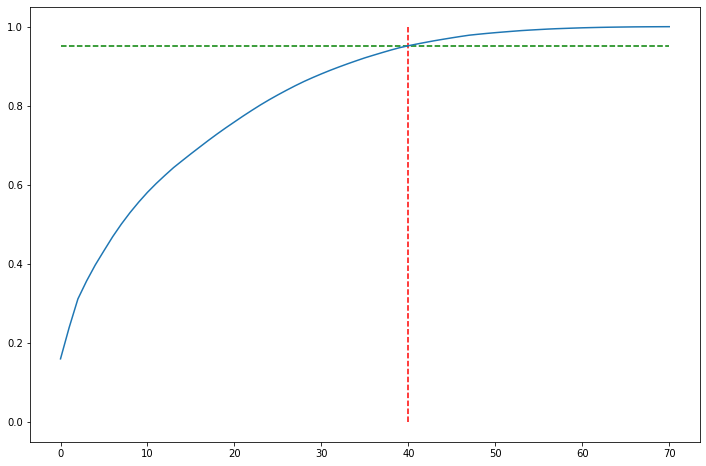

In [910]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=40, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=70, xmin=0, colors="g", linestyles="--")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [911]:
# 90% variance is explained by 19 components. Lets use these to build model

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

In [912]:
# Fit and transform for 19 components

X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.fit_transform(X_test)

In [913]:
# Lets try Logistic Regression
# class_weight will take care of class imbalance

logreg = LogisticRegression(class_weight='balanced')

logreg.fit(X_train_pca, y_train)

C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [914]:
# lets predict values and find important metrics

y_train_pred_logreg = logreg.predict(X_train_pca)
accuracy_train_logreg = metrics.accuracy_score(y_train, y_train_pred_logreg)

print('Logistic Regression')
print('Accuracy for train=', accuracy_train_logreg)

recall_train_logreg = metrics.recall_score(y_train, y_train_pred_logreg)
print('Recall for train=', recall_train_logreg)

classification_train_logreg = metrics.classification_report(y_train, y_train_pred_logreg)
print('Classification report for train=')
print(classification_train_logreg)

metrics.confusion_matrix(y_train, y_train_pred_logreg)

Logistic Regression
Accuracy for train= 0.8381558180687743
Recall for train= 0.8188446438586652
Classification report for train=
              precision    recall  f1-score   support

       False       0.98      0.84      0.90     19126
        True       0.32      0.82      0.46      1783

    accuracy                           0.84     20909
   macro avg       0.65      0.83      0.68     20909
weighted avg       0.92      0.84      0.87     20909



array([[16065,  3061],
       [  323,  1460]], dtype=int64)

Logistic regression has a recall of 0.82 and specificity of 0.84.

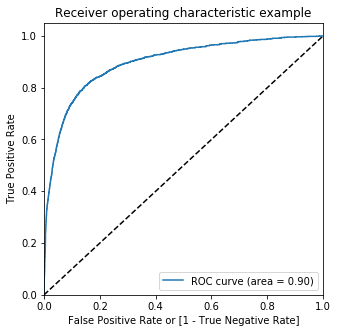

In [915]:
# Checking Roc curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

y_train_proba_logreg = logreg.predict_proba(X_train_pca)
y_train_churn_proba_logreg = y_train_proba_logreg[:,1]

draw_roc(y_train, y_train_churn_proba_logreg)

### ROC AUC score is 0.90

## Hyper Paramter tunning - Logistic Regression
Since the auc score is good and also recall is good, lets try tuning hyper parameters.

In [916]:
# lets try tuning following 'penalty' and C

# Create the parameter grid based on the results of random search 
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10] 
}
# Create a based model
model_logreg = LogisticRegression(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model_logreg, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, scoring='recall')

In [917]:
# Fit the grid search to the data

grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   11.9s finished
C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [918]:
# lets check results

pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.240557,0.010805,0.023736,0.009801,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.843137,0.789916,0.817927,0.772472,0.837079,0.812108,0.027143,16
1,0.360633,0.024057,0.005586,0.000488,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.843137,0.789916,0.815126,0.778090,0.839888,0.813233,0.026027,1
2,0.249330,0.007410,0.005785,0.000748,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",0.843137,0.789916,0.815126,0.778090,0.839888,0.813233,0.026027,1
3,0.346071,0.012408,0.005386,0.001017,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.843137,0.789916,0.815126,0.778090,0.839888,0.813233,0.026027,1
4,0.257510,0.025671,0.006185,0.001466,1,l1,"{'C': 1, 'penalty': 'l1'}",0.843137,0.789916,0.815126,0.778090,0.839888,0.813233,0.026027,1
5,0.332908,0.004694,0.005986,0.000632,1,l2,"{'C': 1, 'penalty': 'l2'}",0.843137,0.789916,0.815126,0.778090,0.839888,0.813233,0.026027,1
6,0.261300,0.006525,0.007781,0.004106,2,l1,"{'C': 2, 'penalty': 'l1'}",0.843137,0.789916,0.815126,0.778090,0.839888,0.813233,0.026027,1
7,0.374795,0.019353,0.005984,0.000630,2,l2,"{'C': 2, 'penalty': 'l2'}",0.843137,0.789916,0.815126,0.778090,0.839888,0.813233,0.026027,1
8,0.258906,0.010337,0.006185,0.000398,3,l1,"{'C': 3, 'penalty': 'l1'}",0.843137,0.789916,0.815126,0.778090,0.839888,0.813233,0.026027,1
9,0.399528,0.020648,0.006184,0.000747,3,l2,"{'C': 3, 'penalty': 'l2'}",0.843137,0.789916,0.815126,0.778090,0.839888,0.813233,0.026027,1


In [919]:
# Above table shows best combination is {'C': 0.1, 'penalty': 'l2'}

grid_search.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [920]:
logreg = grid_search.best_estimator_

logreg.fit(X_train_pca, y_train)

C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [921]:
# lets predict values and find important metrics

y_train_pred_logreg = logreg.predict(X_train_pca)
accuracy_train_logreg = metrics.accuracy_score(y_train, y_train_pred_logreg)

print('Logistic Regression')
print('Accuracy for train=', accuracy_train_logreg)

recall_train_logreg = metrics.recall_score(y_train, y_train_pred_logreg)
print('Recall for train=', recall_train_logreg)

classification_train_logreg = metrics.classification_report(y_train, y_train_pred_logreg)
print('Classification report for train=')
print(classification_train_logreg)

metrics.confusion_matrix(y_train, y_train_pred_logreg)

Logistic Regression
Accuracy for train= 0.8377253814147018
Recall for train= 0.8194054963544588
Classification report for train=
              precision    recall  f1-score   support

       False       0.98      0.84      0.90     19126
        True       0.32      0.82      0.46      1783

    accuracy                           0.84     20909
   macro avg       0.65      0.83      0.68     20909
weighted avg       0.92      0.84      0.87     20909



array([[16055,  3071],
       [  322,  1461]], dtype=int64)

In [922]:
# Finding optimal cutoff
# Let's create columns with different probability cutoffs 

y_train_pred_final_df = pd.DataFrame(y_train_proba_logreg[:,1], columns=['Churn_Proba'])
y_train_pred_final_df['Actual_Churn'] = np.array(y_train)

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final_df[i]= y_train_pred_final_df.Churn_Proba.map(lambda x: 1 if x > i else 0)
y_train_pred_final_df['Churn'] = y_train_pred_logreg

In [923]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_df.Actual_Churn, y_train_pred_final_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.085274  1.000000  0.000000
0.1   0.1  0.386628  0.972518  0.332009
0.2   0.2  0.569420  0.941110  0.534769
0.3   0.3  0.693194  0.905777  0.673377
0.4   0.4  0.778086  0.863152  0.770156
0.5   0.5  0.838156  0.818845  0.839956
0.6   0.6  0.878569  0.756590  0.889940
0.7   0.7  0.905352  0.685923  0.925808
0.8   0.8  0.922952  0.560852  0.956708
0.9   0.9  0.932565  0.392036  0.982955


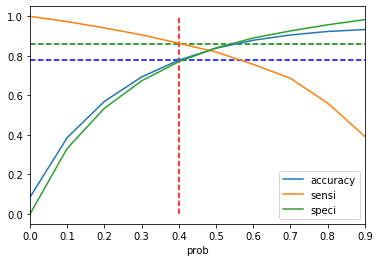

In [924]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.40, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.86, xmax=0.9, xmin=0, colors="g", linestyles="--")
plt.hlines(y=0.78, xmax=0.9, xmin=0, colors="b", linestyles="--")
plt.show()

In [925]:
# At threshold of 0.40, we see Sensitivity is at 0.85, Accuracy is at 0.78 and Specificity is at 0.78
# As we have learnt that retaining the customer is more important, we can choose this threshold

y_test_proba_logreg = logreg.predict_proba(X_test_pca)
y_test_churn_proba_logreg = y_test_proba_logreg[:,1]
y_test_pred_logreg = y_test_churn_proba_logreg >= 0.40

accuracy_test_logreg = metrics.accuracy_score(y_test, y_test_pred_logreg)

print('Logistic Regression (Test)')
print('Accuracy for test=', accuracy_test_logreg)

recall_test_logreg = metrics.recall_score(y_test, y_test_pred_logreg)
print('Recall for test=', recall_test_logreg)


classification_test_logreg = metrics.classification_report(y_test, y_test_pred_logreg)
print('Classification report for train=')
print(classification_test_logreg)

Logistic Regression (Test)
Accuracy for test= 0.6992858736889087
Recall for test= 0.839262187088274
Classification report for train=
              precision    recall  f1-score   support

       False       0.98      0.69      0.81      8203
        True       0.20      0.84      0.32       759

    accuracy                           0.70      8962
   macro avg       0.59      0.76      0.56      8962
weighted avg       0.91      0.70      0.77      8962



Logistic regression is giving decent results with cut off 0.40

### We have chosen cut off as 0.4. If we want more agressive model, then we can reduce the thrshold to 0.35 or even to 0.30 to get more better results.
we can take this call based on business input

# Support Vector Machines

In [562]:
from sklearn.svm import SVC

svc = SVC(class_weight='balanced', gamma='auto') #gamma='auto'to avoid warning
svc.fit(X_train_pca, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [564]:
y_train_pred_svc = svc.predict(X_train_pca)

print('Support Vector Classifier:')
classification_train_svc = metrics.classification_report(y_train, y_train_pred_svc)
print('Classification report for train')
print(classification_train_svc)

Support Vector Classifier:
Classification report for train
              precision    recall  f1-score   support

       False       1.00      0.93      0.96     19126
        True       0.57      0.97      0.72      1783

    accuracy                           0.93     20909
   macro avg       0.78      0.95      0.84     20909
weighted avg       0.96      0.93      0.94     20909



In [567]:
# Lets tune hyper parameters for SVC
# lets try tuning following kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’}, degree, gamma

# Create the parameter grid based on the results of random search 
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [1, 2, 3, 4],
    'gamma': ['scale', 'auto']
}
# Create a based model
model_svc = SVC(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model_svc, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, scoring='recall')

In [568]:
# Fit the grid search to the data

grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 27.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight='balanced',
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'degree': [1, 2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [570]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,77.743616,2.748383,2.422120,0.221034,1,scale,linear,"{'degree': 1, 'gamma': 'scale', 'kernel': 'lin...",0.843137,0.787115,0.803922,0.769663,0.831461,0.807062,0.027215,1
1,25.846253,1.459655,2.968061,0.344146,1,scale,poly,"{'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}",0.843137,0.787115,0.803922,0.769663,0.825843,0.805938,0.026284,10
2,22.819551,0.523508,2.862543,0.049084,1,scale,rbf,"{'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.787115,0.770308,0.767507,0.721910,0.800562,0.769482,0.026623,11
3,24.873057,0.723344,3.186076,0.164815,1,scale,sigmoid,"{'degree': 1, 'gamma': 'scale', 'kernel': 'sig...",0.621849,0.630252,0.661064,0.612360,0.581461,0.621399,0.025801,24
4,76.510115,2.757189,2.524446,0.207091,1,auto,linear,"{'degree': 1, 'gamma': 'auto', 'kernel': 'line...",0.843137,0.787115,0.803922,0.769663,0.831461,0.807062,0.027215,1
5,26.039734,0.560342,2.881891,0.193849,1,auto,poly,"{'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}",0.843137,0.787115,0.803922,0.769663,0.828652,0.806500,0.026730,9
6,24.950248,0.335232,3.155957,0.134299,1,auto,rbf,"{'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.733894,0.722689,0.719888,0.682584,0.730337,0.717880,0.018354,17
7,28.777612,1.292037,3.767721,0.170611,1,auto,sigmoid,"{'degree': 1, 'gamma': 'auto', 'kernel': 'sigm...",0.574230,0.582633,0.613445,0.550562,0.536517,0.571480,0.026656,28
8,76.346951,3.188476,2.508089,0.164350,2,scale,linear,"{'degree': 2, 'gamma': 'scale', 'kernel': 'lin...",0.843137,0.787115,0.803922,0.769663,0.831461,0.807062,0.027215,1
9,25.770257,0.784496,2.733288,0.185903,2,scale,poly,"{'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}",0.787115,0.739496,0.750700,0.710674,0.758427,0.749286,0.024914,16


In [571]:
# best estimator is 

grid_search.best_estimator_

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [573]:
svc = grid_search.best_estimator_

y_train_pred_svc = svc.predict(X_train_pca)

print('Support Vector Classifier:')
classification_train_svc = metrics.classification_report(y_train, y_train_pred_svc)
print('Classification report for train:')
print(classification_train_svc)

Support Vector Classifier:
Classification report for train:
              precision    recall  f1-score   support

       False       0.98      0.85      0.91     19126
        True       0.34      0.81      0.48      1783

    accuracy                           0.85     20909
   macro avg       0.66      0.83      0.69     20909
weighted avg       0.92      0.85      0.87     20909



In [572]:
svc = grid_search.best_estimator_

y_test_pred_svc = svc.predict(X_test_pca)

print('Support Vector Classifier:')
classification_test_svc = metrics.classification_report(y_test, y_test_pred_svc)
print('Classification report for test:')
print(classification_test_svc)

Support Vector Classifier:
Classification report for test:
              precision    recall  f1-score   support

       False       0.97      0.86      0.91      8203
        True       0.33      0.74      0.45       759

    accuracy                           0.85      8962
   macro avg       0.65      0.80      0.68      8962
weighted avg       0.92      0.85      0.87      8962



### SVC is also giving good result but not as good as LogisticRegression
- SVC results are not good for recall.
- Recall score looks a bit overfit (Train recall is 0.81 and Test recall is 0.74)

# Random Forest Classifier

In [574]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

In [576]:
# Fit with default parameters

rfc.fit(X_train_pca,y_train)
y_pred_rfc = rfc.predict(X_test_pca)

In [578]:
y_train_pred_rfc = rfc.predict(X_train_pca)

print('Random Forest:')
classification_train_rfc = metrics.classification_report(y_train, y_train_pred_rfc)
print('Classification report for train:')
print(classification_train_rfc)

Random Forest:
Classification report for train:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00     19126
        True       1.00      0.90      0.94      1783

    accuracy                           0.99     20909
   macro avg       0.99      0.95      0.97     20909
weighted avg       0.99      0.99      0.99     20909



In [589]:
# Hyper parameter tuning

param_grid = {
    'min_samples_leaf': [500, 1000, 1500, 2000],
    'min_samples_split': [500, 1000, 1500, 2000],
    'n_estimators': [50,100,200,300]
}
# Create a based model
rf = RandomForestClassifier(class_weight= 'balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, scoring='recall')

# 'criterion': ['gini', 'entropy'],
#     'oob_score': [True, False],
#     'class_weight': ['balanced_subsample', 'balanced']

In [590]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 17.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [591]:
# scores of GridSearch CV

pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.973714,0.393051,0.068015,0.009659,500,500,50,"{'min_samples_leaf': 500, 'min_samples_split':...",0.812325,0.767507,0.795518,0.778090,0.778090,0.786308,0.015814,60
1,10.626146,0.497417,0.109794,0.007612,500,500,100,"{'min_samples_leaf': 500, 'min_samples_split':...",0.806723,0.781513,0.798319,0.778090,0.789326,0.790796,0.010584,43
2,22.968005,0.610267,0.210905,0.017014,500,500,200,"{'min_samples_leaf': 500, 'min_samples_split':...",0.815126,0.781513,0.806723,0.778090,0.783708,0.793034,0.014957,32
3,33.090131,1.006081,0.309188,0.027790,500,500,300,"{'min_samples_leaf': 500, 'min_samples_split':...",0.823529,0.778711,0.795518,0.775281,0.786517,0.791914,0.017279,36
4,5.475964,0.643813,0.058925,0.007927,500,1000,50,"{'min_samples_leaf': 500, 'min_samples_split':...",0.809524,0.764706,0.801120,0.780899,0.780899,0.787431,0.015984,54
5,10.717490,0.670619,0.106025,0.004760,500,1000,100,"{'min_samples_leaf': 500, 'min_samples_split':...",0.823529,0.778711,0.789916,0.766854,0.780899,0.787985,0.019236,53
6,23.048535,0.554559,0.282521,0.055859,500,1000,200,"{'min_samples_leaf': 500, 'min_samples_split':...",0.817927,0.775910,0.803922,0.778090,0.789326,0.793037,0.015929,31
7,33.918220,0.931229,0.322795,0.020830,500,1000,300,"{'min_samples_leaf': 500, 'min_samples_split':...",0.815126,0.775910,0.795518,0.769663,0.789326,0.789111,0.015941,51
8,5.648721,0.479064,0.058315,0.008828,500,1500,50,"{'min_samples_leaf': 500, 'min_samples_split':...",0.817927,0.778711,0.781513,0.786517,0.792135,0.791362,0.014050,38
9,10.129406,0.215358,0.101702,0.009998,500,1500,100,"{'min_samples_leaf': 500, 'min_samples_split':...",0.803922,0.775910,0.812325,0.775281,0.797753,0.793039,0.014976,30


In [599]:
# Running best estimator for train

rfc = grid_search.best_estimator_

rfc.fit(X_train_pca,y_train)

y_train_pred_rfc = rfc.predict(X_train_pca)

print('Random Forest Classifier:')
classification_train_rfc = metrics.classification_report(y_train, y_train_pred_rfc)
print('Classification report for train:')
print(classification_train_rfc)

Random Forest Classifier:
Classification report for train:
              precision    recall  f1-score   support

       False       0.98      0.83      0.90     19126
        True       0.31      0.82      0.45      1783

    accuracy                           0.83     20909
   macro avg       0.65      0.83      0.68     20909
weighted avg       0.92      0.83      0.86     20909



In [600]:
# Lets run on test

y_test_pred_rfc = rfc.predict(X_test_pca)

print('Random Forest Classifier:')
classification_test_rfc = metrics.classification_report(y_test, y_test_pred_rfc)
print('Classification report for test:')
print(classification_test_rfc)

Random Forest Classifier:
Classification report for test:
              precision    recall  f1-score   support

       False       0.97      0.83      0.90      8203
        True       0.29      0.74      0.41       759

    accuracy                           0.82      8962
   macro avg       0.63      0.79      0.65      8962
weighted avg       0.91      0.82      0.85      8962



In [601]:
# Lets try 2nd best estimator

rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1000,
                       min_samples_split=2000, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

rfc.fit(X_train_pca,y_train)

y_train_pred_rfc = rfc.predict(X_train_pca)

print('Random Forest Classifier:')
classification_train_rfc = metrics.classification_report(y_train, y_train_pred_rfc)
print('Classification report for train:')
print(classification_train_rfc)

Random Forest Classifier:
Classification report for train:
              precision    recall  f1-score   support

       False       0.98      0.85      0.91     19126
        True       0.33      0.81      0.47      1783

    accuracy                           0.85     20909
   macro avg       0.66      0.83      0.69     20909
weighted avg       0.92      0.85      0.87     20909



In [602]:
# Lets run on test

y_test_pred_rfc = rfc.predict(X_test_pca)

print('Random Forest Classifier:')
classification_test_rfc = metrics.classification_report(y_test, y_test_pred_rfc)
print('Classification report for test:')
print(classification_test_rfc)

Random Forest Classifier:
Classification report for test:
              precision    recall  f1-score   support

       False       0.97      0.85      0.91      8203
        True       0.31      0.72      0.44       759

    accuracy                           0.84      8962
   macro avg       0.64      0.79      0.67      8962
weighted avg       0.91      0.84      0.87      8962



## Random Forest Classifier seems to be overfitting the data
Also the results are not better than LogisticRegression

# XGBoost Classifier

In [423]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

xgboost_model = XGBClassifier()
xgboost_model.fit(X_train_pca, y_train)

y_pred_xgboost = xgboost_model.predict(X_test_pca)

accuracy_xgboost = metrics.accuracy_score(y_test, y_pred_xgboost)

print('XGB accuracy:', accuracy_xgboost)

XGB accuracy: 0.9280294577103325


In [424]:
(len(y_test) - y_test.sum())/len(y_test)

0.9153090827940192

In [426]:
recall_xgboost = metrics.recall_score(y_test, y_pred_xgboost)
print(recall_xgboost)

metrics.confusion_matrix(y_test, y_pred_xgboost)

0.27009222661396576


array([[8112,   91],
       [ 554,  205]], dtype=int64)

In [427]:
# HP tuning for XGBoost

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'n_estimators': [300,400,500],
    'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200, class_weight='balanced')

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      


model_cv.fit(X_train, y_train) 

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 12.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     class_weight='balanced',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'n_estimators': [300, 400,

In [428]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,8.603316,0.412623,0.077471,0.019269,0.2,300,0.3,"{'learning_rate': 0.2, 'n_estimators': 300, 's...",0.519328,0.526936,0.491582,0.512616,0.015193,4,0.643098,0.631623,0.637511,0.637410,0.004685
1,10.925106,0.043155,0.074799,0.012928,0.2,300,0.6,"{'learning_rate': 0.2, 'n_estimators': 300, 's...",0.487395,0.542088,0.483165,0.504214,0.026834,9,0.650673,0.647603,0.654331,0.650869,0.002750
2,11.254574,0.183155,0.059530,0.000463,0.2,300,0.9,"{'learning_rate': 0.2, 'n_estimators': 300, 's...",0.489076,0.538721,0.498316,0.508702,0.021557,7,0.644781,0.655172,0.650126,0.650027,0.004243
3,10.972312,0.010628,0.087434,0.007299,0.2,400,0.3,"{'learning_rate': 0.2, 'n_estimators': 400, 's...",0.507563,0.545455,0.493266,0.515427,0.022019,3,0.669192,0.670311,0.653490,0.664331,0.007679
4,14.577073,0.359618,0.089747,0.006670,0.2,400,0.6,"{'learning_rate': 0.2, 'n_estimators': 400, 's...",0.502521,0.543771,0.488215,0.511502,0.023552,5,0.697811,0.688814,0.688814,0.691813,0.004241
5,14.350955,0.260227,0.083452,0.009395,0.2,400,0.9,"{'learning_rate': 0.2, 'n_estimators': 400, 's...",0.487395,0.537037,0.488215,0.504214,0.023210,9,0.682660,0.693860,0.690496,0.689006,0.004692
6,15.113568,1.883432,0.113031,0.010843,0.2,500,0.3,"{'learning_rate': 0.2, 'n_estimators': 500, 's...",0.502521,0.533670,0.498316,0.511502,0.015768,5,0.710438,0.706476,0.684609,0.700508,0.011358
7,19.116192,0.166309,0.114360,0.012332,0.2,500,0.6,"{'learning_rate': 0.2, 'n_estimators': 500, 's...",0.510924,0.553872,0.496633,0.520476,0.024323,1,0.728114,0.741800,0.727502,0.732472,0.006600
8,18.984877,0.169886,0.120678,0.038091,0.2,500,0.9,"{'learning_rate': 0.2, 'n_estimators': 500, 's...",0.495798,0.537037,0.489899,0.507577,0.020969,8,0.727273,0.731707,0.740118,0.733033,0.005327
9,9.211690,0.432180,0.072475,0.009153,0.6,300,0.3,"{'learning_rate': 0.6, 'n_estimators': 300, 's...",0.482353,0.523569,0.466330,0.490750,0.024109,17,0.729798,0.721615,0.733389,0.728267,0.004927


In [429]:
df = df.drop('aon_mon', axis=1)
df['aon_mon_cat'] = df['aon_mon_cat'].astype(float)

# Conclusion of best performing model

- Which Model is best
- How many PCA comps it required, Variance explained
- Accuracy, Recall, Specificity of each model tried
- Why we selected the model

## Without PCA

Explanation TODO

In [1037]:
# y_train_copy = y_train.copy()
# y_train_copy.shape
# y_train_copy.reshape(-1,)
# y_train_copy.shape
# pd.DataFrame(y_train, columns=['churn']).churn

# y_train.ravel()

logreg

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [1044]:
from sklearn.linear_model import LogisticRegression
logreg_rfe = LogisticRegression(class_weight='balanced')

from sklearn.feature_selection import RFE
rfe = RFE(logreg_rfe, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train.ravel())

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[('arpu_8', False, 10),
 ('onnet_mou_8', False, 12),
 ('offnet_mou_8', False, 20),
 ('roam_ic_mou_8', False, 33),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_8', False, 5),
 ('loc_og_t2m_mou_8', False, 4),
 ('loc_og_t2f_mou_8', False, 54),
 ('loc_og_t2c_mou_8', False, 30),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_t2f_mou_8', False, 41),
 ('std_og_mou_8', True, 1),
 ('spl_og_mou_8', False, 45),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', True, 1),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_t2t_mou_8', False, 56),
 ('std_ic_t2m_mou_8', False, 26),
 ('std_ic_t2f_mou_8', False, 47),
 ('std_ic_mou_8', False, 46),
 ('total_ic_mou_8', False, 8),
 ('isd_ic_mou_8', False, 9),
 ('ic_others_8', False, 42),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', True, 1),
 ('max_rech_amt_8', False, 28),
 ('last_day_rch_amt_8', True, 1),
 ('vol_2g_mb_8', False, 2),
 ('vol

In [1045]:
# Lets find RFE cols

cols = list(X_train.columns[rfe.support_])
cols

['roam_og_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_mou_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'last_day_rch_amt_8',
 'vol_3g_mb_8',
 'chg_total_rech_amt']

In [1046]:
# Lets find required columns

X_train_rfe = X_train[cols]
X_test_rfe = X_test[cols]

In [1047]:
# Fit a model

logreg_rfe.fit(X_train_rfe, y_train.ravel())

C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [1048]:
# Lets find classification report

y_train_pred_logreg_rfe = logreg_rfe.predict(X_train_rfe)

print('Logistic Regression with RFE:')
classification_train_logreg_rfe = metrics.classification_report(y_train, y_train_pred_logreg_rfe)
print('Classification report for Train:')
print(classification_train_logreg_rfe)

Logistic Regression with RFE:
Classification report for Train:
              precision    recall  f1-score   support

       False       0.98      0.84      0.90     19126
        True       0.32      0.82      0.46      1783

    accuracy                           0.84     20909
   macro avg       0.65      0.83      0.68     20909
weighted avg       0.92      0.84      0.87     20909



In [1049]:
# Lets find classification report for test

y_test_pred_logreg_rfe = logreg_rfe.predict(X_test_rfe)

print('Logistic Regression with RFE:')
classification_test_logreg_rfe = metrics.classification_report(y_test, y_test_pred_logreg_rfe)
print('Classification report for Test:')
print(classification_test_logreg_rfe)

Logistic Regression with RFE:
Classification report for Test:
              precision    recall  f1-score   support

       False       0.98      0.84      0.90      8203
        True       0.31      0.82      0.45       759

    accuracy                           0.83      8962
   macro avg       0.65      0.83      0.68      8962
weighted avg       0.92      0.83      0.86      8962



In [1050]:
# Reusable function to calculate VIF

def calculate_vif(train_df):
    vif = pd.DataFrame()
    X = train_df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)

    return vif

In [1051]:
# Lets check VIF

calculate_vif(X_train_rfe)

,Features,VIF
4,std_og_mou_8,27.95
9,loc_ic_mou_8,21.83
7,loc_ic_t2m_mou_8,12.37
2,std_og_t2t_mou_8,9.95
3,std_og_t2m_mou_8,9.40
5,total_og_mou_8,6.62
11,total_rech_amt_8,4.57
6,loc_ic_t2t_mou_8,4.49
1,loc_og_mou_8,3.30
14,chg_total_rech_amt,2.13


In [1052]:
# Lets drop std_og_mou_8

cols.remove('std_og_mou_8')
X_train_rfe = X_train[cols]
calculate_vif(X_train_rfe)

,Features,VIF
8,loc_ic_mou_8,21.77
6,loc_ic_t2m_mou_8,12.33
4,total_og_mou_8,5.33
10,total_rech_amt_8,4.57
5,loc_ic_t2t_mou_8,4.48
1,loc_og_mou_8,2.92
13,chg_total_rech_amt,2.13
2,std_og_t2t_mou_8,2.02
3,std_og_t2m_mou_8,1.86
9,total_rech_num_8,1.85


In [1053]:
# Lets drop loc_ic_mou_8

cols.remove('loc_ic_mou_8')
X_train_rfe = X_train[cols]
calculate_vif(X_train_rfe)

,Features,VIF
4,total_og_mou_8,5.27
9,total_rech_amt_8,4.56
1,loc_og_mou_8,2.89
12,chg_total_rech_amt,2.13
2,std_og_t2t_mou_8,1.99
6,loc_ic_t2m_mou_8,1.94
8,total_rech_num_8,1.85
3,std_og_t2m_mou_8,1.84
10,last_day_rch_amt_8,1.65
5,loc_ic_t2t_mou_8,1.54


In [1054]:
# Lets drop total_og_mou_8

cols.remove('total_og_mou_8')
X_train_rfe = X_train[cols]
calculate_vif(X_train_rfe)

,Features,VIF
8,total_rech_amt_8,3.67
1,loc_og_mou_8,2.18
11,chg_total_rech_amt,2.12
5,loc_ic_t2m_mou_8,1.90
7,total_rech_num_8,1.84
9,last_day_rch_amt_8,1.64
4,loc_ic_t2t_mou_8,1.53
6,loc_ic_t2f_mou_8,1.28
2,std_og_t2t_mou_8,1.22
3,std_og_t2m_mou_8,1.21


In [1055]:
# Fit a model

logreg_rfe.fit(X_train_rfe, y_train)

# Lets find classification report

y_train_pred_logreg_rfe = logreg_rfe.predict(X_train_rfe)

print('Logistic Regression with RFE:')
classification_train_logreg_rfe = metrics.classification_report(y_train, y_train_pred_logreg_rfe)
print('Classification report for Train:')
print(classification_train_logreg_rfe)

# Lets find classification report for test

X_test_rfe = X_test[cols]

y_test_pred_logreg_rfe = logreg_rfe.predict(X_test_rfe)

print('Logistic Regression with RFE:')
classification_test_logreg_rfe = metrics.classification_report(y_test, y_test_pred_logreg_rfe)
print('Classification report for Test:')
print(classification_test_logreg_rfe)

C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression with RFE:
Classification report for Train:
              precision    recall  f1-score   support

       False       0.98      0.82      0.89     19126
        True       0.30      0.82      0.43      1783

    accuracy                           0.82     20909
   macro avg       0.64      0.82      0.66     20909
weighted avg       0.92      0.82      0.85     20909

Logistic Regression with RFE:
Classification report for Test:
              precision    recall  f1-score   support

       False       0.98      0.81      0.89      8203
        True       0.29      0.82      0.42       759

    accuracy                           0.81      8962
   macro avg       0.63      0.81      0.66      8962
weighted avg       0.92      0.81      0.85      8962



In [1069]:
# finding feature importance

result = pd.DataFrame((zip(np.array(cols), logreg_rfe.coef_[0])), columns=['Feature', 'Importance'])

# sorting based on absolute values of coefficients
result = result.reindex(result.Importance.abs().sort_values(ascending=False).index)
result


,Feature,Importance
9,last_day_rch_amt_8,-0.730498
0,roam_og_mou_8,0.706998
11,chg_total_rech_amt,-0.670683
7,total_rech_num_8,-0.516339
10,vol_3g_mb_8,-0.404029
5,loc_ic_t2m_mou_8,-0.247819
3,std_og_t2m_mou_8,0.209764
2,std_og_t2t_mou_8,0.206434
1,loc_og_mou_8,-0.170714
6,loc_ic_t2f_mou_8,-0.089211


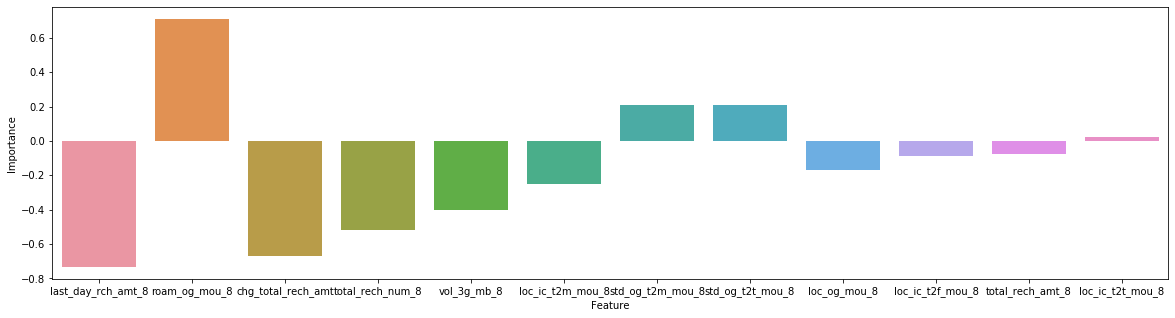

In [1070]:
plt.figure(figsize=(20,5))

sns.barplot(data=result, x='Feature', y='Importance')

### Analysis based on above model
- Last Day Recharge Amount is strong indicator of churn. If the amount is reducing then it will indicate possible churn
- Roaming outgoing calls are increasing then user might churn
- If usage of 3G data is reducing then the user might churn


# Random Forest (without PCA)

In [1072]:
rfc_rfe = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1000,
                       min_samples_split=2000, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [1074]:
rfc_rfe.fit(X_train_rfe, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1000,
                       min_samples_split=2000, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [1075]:
# Lets find classification report

y_train_pred_rf_rfe = rfc_rfe.predict(X_train_rfe)

print('Random Forest Regression with RFE:')
classification_train_rf_rfe = metrics.classification_report(y_train, y_train_pred_rf_rfe)
print('Classification report for Train:')
print(classification_train_rf_rfe)

Random Forest Regression with RFE:
Classification report for Train:
              precision    recall  f1-score   support

       False       0.98      0.84      0.91     19126
        True       0.33      0.84      0.47      1783

    accuracy                           0.84     20909
   macro avg       0.66      0.84      0.69     20909
weighted avg       0.93      0.84      0.87     20909



In [1076]:
# Lets find classification report for test

y_test_pred_rf_rfe = rfc_rfe.predict(X_test_rfe)

print('Random Forest with RFE:')
classification_test_rf_rfe = metrics.classification_report(y_test, y_test_pred_logreg_rfe)
print('Classification report for Test:')
print(classification_test_rf_rfe)

Random Forest with RFE:
Classification report for Test:
              precision    recall  f1-score   support

       False       0.98      0.81      0.89      8203
        True       0.29      0.82      0.42       759

    accuracy                           0.81      8962
   macro avg       0.63      0.81      0.66      8962
weighted avg       0.92      0.81      0.85      8962



In [1077]:
# Feature importances

rfc_rfe.feature_importances_

array([0.27384297, 0.04846911, 0.00959948, 0.00445583, 0.02129283,
       0.05591402, 0.01385022, 0.05051279, 0.19723222, 0.13333636,
       0.00959827, 0.1818959 ])

In [1083]:
# finding feature importance

result_rf = pd.DataFrame((zip(np.array(cols), rfc_rfe.feature_importances_)), columns=['Feature', 'Importance'])

# sorting based on absolute values of coefficients
result_rf = result_rf.sort_values(by='Importance', ascending=False)


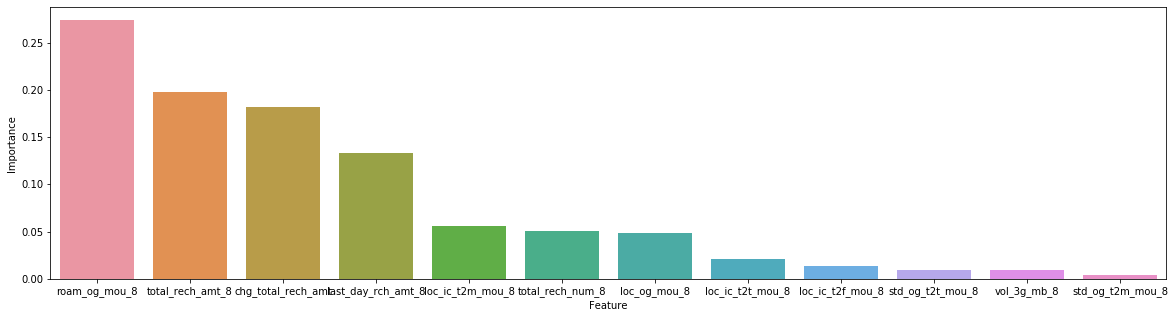

In [1084]:
plt.figure(figsize=(20,5))

sns.barplot(data=result_rf, x='Feature', y='Importance')

### Analysis based on above model
- Roaming outgoing calls are increasing then user might churn
- Last Day Recharge Amount is strong indicator of churn. If the amount is reducing then it will indicate possible churn


### Strategy
- Give better offers for couple of months to people who are reducing recharge amount
- Check roaming charges, give roaming charge packs to users who use roaming a lot
- Check roaming quality. Improve the roaming quality if there are any issues
- Give better 3g services
- Give combo packs having roaming and 3g